In [1]:
import cfgrib # This is proper bs
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

/home/wjiang33/miniconda3/envs/bubblebath/lib/python3.12/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.38.0 or higher is recommended. You are running version 2.23.0
  warnings.warn(


In [2]:
filename = "/sciserver/filedb06-03/ocean/wenrui_temp/7deb66796f72783edf8fcb82f5c9e8ce.grib"

In [7]:
different_keys = [
    'mslhf',
    'msnlwrf',
    'msnlwrfcs',
    'msnswrf',
    'msnswrfcs',
    'msshf',
    'slhf',
    'ssr',
    'ssrc',
    'str',
    'strc',
    'sshf',
]

In [10]:
non_rad = xr.open_dataset(filename,engine = 'cfgrib')

skipping variable: paramId==235034 shortName='mslhf'
Traceback (most recent call last):
  File "/home/wjiang33/miniconda3/envs/bubblebath/lib/python3.12/site-packages/cfgrib/dataset.py", line 725, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/wjiang33/miniconda3/envs/bubblebath/lib/python3.12/site-packages/cfgrib/dataset.py", line 641, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='time' value=Variable(dimensions=('time',), data=array([ 694224000,  696902400,  699408000,  702086400,  704678400,
        707356800,  709948800,  712627200,  715305600,  717897600,
        720576000,  723168000,  725846400,  728524800,  730944000,
        733622400,  736214400,  738892800,  741484800,  744163200,
        746841600,  749433600,  752112000,  754704000,  757382400,
        760060800,  762480000,  765158400,  767750400,  770428800,
        773020800,  775699200,  778377600,  780969600,  

In [8]:
ds = cfgrib.open_dataset(
    filename,
    filter_by_keys={
        "shortName": different_keys,
    },
    indexpath=""
)

In [9]:
ds

<xarray.Dataset>
Dimensions:     (time: 312, latitude: 721, longitude: 1440)
Coordinates:
    number      int64 ...
  * time        (time) datetime64[ns] 1991-12-31T18:00:00 ... 2017-11-30T18:0...
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    valid_time  (time) datetime64[ns] ...
Data variables:
    mslhf       (time, latitude, longitude) float32 ...
    msnlwrf     (time, latitude, longitude) float32 ...
    msnlwrfcs   (time, latitude, longitude) float32 ...
    msnswrf     (time, latitude, longitude) float32 ...
    msnswrfcs   (time, latitude, longitude) float32 ...
    msshf       (time, latitude, longitude) float32 ...
    slhf        (time, latitude, longitude) float32 ...
    ssr         (time, latitude, longitude) float32 ...
    ssrc        (time, latitude, longitude) float32 ...
    str         (time, latitude, longitude) float32 ...
    strc        (time, latitude, longitude) float32 ...
    sshf        (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-03-27T14:43 GRIB to CDM+CF via cfgrib-0.9.1...

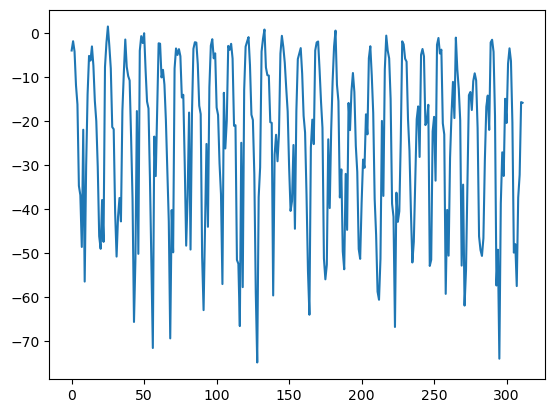

In [12]:
plt.plot(ds.mslhf[:,100,100])

In [13]:
ds.time

<xarray.DataArray 'time' (time: 312)>
array(['1991-12-31T18:00:00.000000000', '1992-01-31T18:00:00.000000000',
       '1992-02-29T18:00:00.000000000', ..., '2017-09-30T18:00:00.000000000',
       '2017-10-31T18:00:00.000000000', '2017-11-30T18:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    number      int64 ...
  * time        (time) datetime64[ns] 1991-12-31T18:00:00 ... 2017-11-30T18:0...
    step        timedelta64[ns] ...
    surface     float64 ...
    valid_time  (time) datetime64[ns] ...
Attributes:
    long_name:      initial time of forecast
    standard_name:  forecast_reference_time

In [18]:
save_path = '/sciserver/filedb06-03/ocean/wenrui_temp/'

In [19]:
ds.to_zarr(save_path+'eras5_heat_flux.zarr')

In [20]:
non_rad.to_zarr(save_path+'eras5_cloud_wind.zarr')

In [24]:
filename = "/sciserver/filedb06-03/ocean/wenrui_temp/4660d12d36f931280646cc10f5be41a5.grib"

In [25]:
latent = xr.open_dataset(filename,engine = 'cfgrib')

In [108]:
latent['p62.162']

<xarray.DataArray 'p62.162' (time: 312, latitude: 721, longitude: 1440)>
[323930880 values with dtype=float32]
Coordinates:
    number            int64 ...
  * time              (time) datetime64[ns] 1992-01-01 1992-02-01 ... 2017-12-01
    step              timedelta64[ns] ...
    entireAtmosphere  float64 ...
  * latitude          (latitude) float64 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude         (longitude) float64 0.0 0.25 0.5 ... 359.2 359.5 359.8
    valid_time        (time) datetime64[ns] ...
Attributes: (12/31)
    GRIB_paramId:                             162062
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         entireAtmosphere
    GRIB_stepUnits:                           1
    GRIB_stepType:                            avgua
    ...                                       ...
    GRIB_shortName:                           vipile
    GRIB_totalNumber:                         0
    GRIB_units:                               J m**-2
    long_name:                                Vertical integral of potential+...
    units:                                    J m**-2
    standard_name:                            unknown

In [27]:
latent['latent'] = latent['p62.162'] - latent['p61.162']

In [28]:
out = latent[['latent']]

In [29]:
out

<xarray.Dataset>
Dimensions:           (time: 312, latitude: 721, longitude: 1440)
Coordinates:
    number            int64 ...
  * time              (time) datetime64[ns] 1992-01-01 1992-02-01 ... 2017-12-01
    step              timedelta64[ns] ...
    entireAtmosphere  float64 ...
  * latitude          (latitude) float64 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude         (longitude) float64 0.0 0.25 0.5 ... 359.2 359.5 359.8
    valid_time        (time) datetime64[ns] ...
Data variables:
    latent            (time, latitude, longitude) float32 4.565e+06 ... 2e+06
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-03-27T18:22 GRIB to CDM+CF via cfgrib-0.9.1...

In [30]:
out.to_zarr(save_path+'eras5_latent.zarr')

In [31]:
filename = "/sciserver/filedb06-03/ocean/wenrui_temp/addeff8aca3364f9a703c180c49ae43d.grib"

In [32]:
moi_flux = xr.open_dataset(filename,engine = 'cfgrib')

skipping variable: paramId==162084 shortName='p84.162'
Traceback (most recent call last):
  File "/home/wjiang33/miniconda3/envs/bubblebath/lib/python3.12/site-packages/cfgrib/dataset.py", line 725, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/wjiang33/miniconda3/envs/bubblebath/lib/python3.12/site-packages/cfgrib/dataset.py", line 641, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='time' value=Variable(dimensions=('time',), data=array([ 694202400,  696880800,  699386400,  702064800,  704656800,
        707335200,  709927200,  712605600,  715284000,  717876000,
        720554400,  723146400,  725824800,  728503200,  730922400,
        733600800,  736192800,  738871200,  741463200,  744141600,
        746820000,  749412000,  752090400,  754682400,  757360800,
        760039200,  762458400,  765136800,  767728800,  770407200,
        772999200,  775677600,  778356000,  780948000,

In [37]:
# names = [
#     'p84.162',
#     'p71.162',
#     'p72.162',
# ]

In [44]:
# moi_flux2 = xr.open_dataset(
#     filename,
#     filter_by_keys={
#         "shortName": 'p84.162',
#     },
#     indexpath=""
# )

In [47]:
# moi_flux2.nbytes

In [48]:
moi_flux

<xarray.Dataset>
Dimensions:     (time: 312, latitude: 721, longitude: 1440)
Coordinates:
    number      int64 ...
  * time        (time) datetime64[ns] 1991-12-31T18:00:00 ... 2017-11-30T18:0...
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    valid_time  (time) datetime64[ns] ...
Data variables:
    tp          (time, latitude, longitude) float32 ...
    e           (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-03-27T20:55 GRIB to CDM+CF via cfgrib-0.9.1...

In [49]:
moi_flux.to_zarr(save_path+'eras5_evap_prec.zarr')

In [50]:
filename = "/sciserver/filedb06-03/ocean/wenrui_temp/de22a1a1dc08e03b242dd9e8aa5404cc.grib"

In [51]:
tot_heat = xr.open_dataset(filename,engine = 'cfgrib')

In [53]:
tot_heat.to_zarr(save_path+'eras5_tot_heat.zarr')

In [54]:
filename = "/sciserver/filedb06-03/ocean/wenrui_temp/e3634b787386459401858079c3bbcf13.grib"

In [55]:
toa_flux = xr.open_dataset(filename,engine = 'cfgrib')

In [58]:
toa_flux.to_zarr(save_path+'eras5_toa_flux.zarr')

In [59]:
filename = "/sciserver/filedb06-03/ocean/wenrui_temp/798ddce0e62721be19aa626f426c1a68.grib"

In [60]:
int_flux = xr.open_dataset(filename,engine = 'cfgrib')

In [64]:
int_flux['div_q'] = int_flux['p84.162']
int_flux['div_t'] = int_flux['p83.162']
int_flux['adv_t_x'] = int_flux['p69.162']
int_flux['adv_t_y'] = int_flux['p70.162']
int_flux['adv_q_x'] = int_flux['p71.162']
int_flux['adv_q_y'] = int_flux['p72.162']

In [67]:
out_flux = int_flux[['div_q','div_t','adv_t_x','adv_t_y','adv_q_x','adv_q_y']]

In [68]:
out_flux.to_zarr(save_path+'eras5_integrated_flux.zarr')

In [69]:
filename = "/sciserver/filedb06-03/ocean/wenrui_temp/c07140f86ce4ec45e51c35382e8d4fdb.grib"

In [73]:
sstm = xr.open_dataset(filename,engine = 'cfgrib').mean(dim = 'time')

In [74]:
sstm.to_zarr(save_path+'eras5_sst.zarr',mode = 'w')

In [91]:
filename = "/sciserver/filedb06-03/ocean/wenrui_temp/b777beccd068c4e3a2fc1c00b884a956.grib"

In [92]:
could_be_mass = xr.open_dataset(filename,engine = 'cfgrib')

In [106]:
could_be_mass.rename({'p53.162':'col_mass'}).to_zarr(save_path+'eras5_col_mass.zarr',mode = 'w')

In [107]:
could_be_mass['p53.162']

<xarray.DataArray 'p53.162' (time: 312, latitude: 721, longitude: 1440)>
[323930880 values with dtype=float32]
Coordinates:
    number            int64 ...
  * time              (time) datetime64[ns] 1992-01-01 1992-02-01 ... 2017-12-01
    step              timedelta64[ns] ...
    entireAtmosphere  float64 ...
  * latitude          (latitude) float64 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude         (longitude) float64 0.0 0.25 0.5 ... 359.2 359.5 359.8
    valid_time        (time) datetime64[ns] ...
Attributes: (12/31)
    GRIB_paramId:                             162053
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         entireAtmosphere
    GRIB_stepUnits:                           1
    GRIB_stepType:                            avgua
    ...                                       ...
    GRIB_shortName:                           vima
    GRIB_totalNumber:                         0
    GRIB_units:                               kg m**-2
    long_name:                                Vertical integral of mass of at...
    units:                                    kg m**-2
    standard_name:                            unknown

In [95]:
filename = "/sciserver/filedb06-03/ocean/wenrui_temp/d2bd9f2aa5625fdfd19d0e83bec4cf04.grib"

In [96]:
ins_windstress = xr.open_dataset(filename,engine = 'cfgrib')

In [97]:
ins_windstress.to_zarr(save_path+'eras5_wstrs.zarr',mode = 'w')

In [98]:
ins_windstress

<xarray.Dataset>
Dimensions:     (time: 312, latitude: 721, longitude: 1440)
Coordinates:
    number      int64 ...
  * time        (time) datetime64[ns] 1991-12-31T18:00:00 ... 2017-11-30T18:0...
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    valid_time  (time) datetime64[ns] ...
Data variables:
    metss       (time, latitude, longitude) float32 ...
    mntss       (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-04-14T15:44 GRIB to CDM+CF via cfgrib-0.9.1...

# Seems like the mn_windstress is the instant...

In [99]:
filename = "/sciserver/filedb06-03/ocean/wenrui_temp/62f47ff24a0fe237432a76efc8a0ca9e.grib"
mn_windstress = xr.open_dataset(filename,engine = 'cfgrib')

In [100]:
mn_windstress.to_zarr(save_path+'eras5_surface_strs.zarr',mode = 'w')

In [101]:
mn_windstress

<xarray.Dataset>
Dimensions:     (time: 312, latitude: 721, longitude: 1440)
Coordinates:
    number      int64 ...
  * time        (time) datetime64[ns] 1991-12-31T18:00:00 ... 2017-11-30T18:0...
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    valid_time  (time) datetime64[ns] ...
Data variables:
    ewss        (time, latitude, longitude) float32 ...
    nsss        (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-04-14T15:46 GRIB to CDM+CF via cfgrib-0.9.1...